In [1]:
import cv2#reading and resizing                 
import numpy as np#arrays         
import os#dealing with directories                  
from random import shuffle #to shuffle data
from tqdm import tqdm#loop progress bar  
from sklearn.metrics import roc_auc_score    
import matplotlib.pyplot as plt # for visualizations
import tensorflow as tf # For tensor operations
import pandas as pd # for manipulating data
import zipfile
import os, sys

C:\Users\Abdelrahman Nasser\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abdelrahman Nasser\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abdelrahman Nasser\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abdelrahman Nasser\Anaconda3\lib\site-packages\tensorflow\

In [4]:
IMG_SIZE = 80

epochs =10
step_size = 8
IMG_SIZE_ALEXNET = 227
validating_size = 40
nodes_fc1 = 4096
nodes_fc2 = 4096
output_classes = 5

TRAIN_DIR ='D:/msa courses/data'

#Current working directory

print(TRAIN_DIR) # current working directory

D:/msa courses/data


In [3]:
#def create_train_data():
    #training_data = [] 
    #for img in tqdm(os.listdir(TRAIN_DIR)):
        #path = os.path.join(TRAIN_DIR,img)
        #img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        #training_data.append([np.array(img)])
    #shuffle(training_data)
    #np.save('trainer_data.npy',training_data)
    #return training_data

import numpy as np
img_folder_path = "D:\\msa courses\\data set 2\\train\\"
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']
print(imgPaths)

i=0
filenames = os.listdir("D:\\msa courses\\data set 2\\train\\")
trains = []
img = 0
print(len(filenames))
for filename in filenames:
  i= i + 1
  image_path = "D:\\msa courses\\data set 2\\train\\" + filename
  label = filename.split("_")[0]
  img = cv2.imread(image_path)

  if label == 'coolant':
    trains.append([img, [1,0,0,0,0]])
    print(i)
  if label == 'dipstick':
    trains.append([img, [0,1,0,0,0]])
    print(i)
  if label == 'engine':
    trains.append([img, [0,0,1,0,0]])
    print(i)
  if label == 'oilcap':
    trains.append([img, [0,0,0,1,0]])
    print(i)
  if label == 'wiper':
    trains.append([img, [0,0,0,0,1]])
    print(i)
    
train_data = trains
print("#####################################################")
print("train lenghth")
print(len(train_data))

['D:\\msa courses\\data set 2\\train\\coolant_03.png', 'D:\\msa courses\\data set 2\\train\\coolant_04.png', 'D:\\msa courses\\data set 2\\train\\coolant_05.png', 'D:\\msa courses\\data set 2\\train\\coolant_06.png', 'D:\\msa courses\\data set 2\\train\\coolant_07.png', 'D:\\msa courses\\data set 2\\train\\coolant_08.png', 'D:\\msa courses\\data set 2\\train\\coolant_09.png', 'D:\\msa courses\\data set 2\\train\\coolant_10.png', 'D:\\msa courses\\data set 2\\train\\coolant_100.png', 'D:\\msa courses\\data set 2\\train\\coolant_101.png', 'D:\\msa courses\\data set 2\\train\\coolant_102.png', 'D:\\msa courses\\data set 2\\train\\coolant_103.png', 'D:\\msa courses\\data set 2\\train\\coolant_104.png', 'D:\\msa courses\\data set 2\\train\\coolant_105.png', 'D:\\msa courses\\data set 2\\train\\coolant_106.png', 'D:\\msa courses\\data set 2\\train\\coolant_107.png', 'D:\\msa courses\\data set 2\\train\\coolant_108.png', 'D:\\msa courses\\data set 2\\train\\coolant_109.png', 'D:\\msa courses\


691
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

In [5]:
#train_data = create_train_data()
print(imgPaths[500])
print(train_data[500])

D:\msa courses\data set 2\train\oilcap_37.png
[array([[[ 22,  30,  23],
        [ 23,  31,  24],
        [ 22,  30,  23],
        ...,
        [135, 126, 106],
        [123, 114,  94],
        [102,  93,  73]],

       [[ 20,  28,  21],
        [ 25,  33,  26],
        [ 26,  34,  27],
        ...,
        [127, 118,  98],
        [119, 110,  90],
        [107,  98,  78]],

       [[ 18,  26,  19],
        [ 25,  33,  26],
        [ 25,  33,  26],
        ...,
        [118, 108,  90],
        [115, 106,  86],
        [114, 105,  85]],

       ...,

       [[ 21,  24,  32],
        [ 21,  24,  32],
        [ 20,  23,  31],
        ...,
        [202, 185, 172],
        [203, 186, 173],
        [203, 186, 173]],

       [[ 19,  21,  29],
        [ 21,  23,  31],
        [ 22,  24,  32],
        ...,
        [201, 183, 172],
        [201, 183, 172],
        [201, 183, 172]],

       [[ 17,  19,  27],
        [ 21,  23,  31],
        [ 23,  25,  33],
        ...,
        [200, 182, 171],
  

In [6]:
np.random.shuffle(train_data)

In [7]:
np.random.shuffle(train_data)

In [8]:
img_folder_path = "D:\\msa courses\\data set 2\\test\\"
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']
print(imgPaths)

i=0
filenames = os.listdir("D:\\msa courses\\data set 2\\test\\")
tests = []
#labels = []
img = 0
print(len(filenames))
for filename in filenames:
  i= i + 1
  image_path = "D:\\msa courses\\data set 2\\test\\" + filename
  label = filename.split("_")[0]
  img = cv2.imread(image_path)

  if label == 'coolant':
    tests.append([img, [1,0,0,0,0]])
    print(i)
  if label == 'dipstick':
    tests.append([img, [0,1,0,0,0]])
    print(i)
  if label == 'engine':
    tests.append([img, [0,0,1,0,0]])
    print(i)
  if label == 'oilcap':
    tests.append([img, [0,0,0,1,0]])
    print(i)
  if label == 'wiper':
    tests.append([img, [0,0,0,0,1]])
    print(i)
  
    
test_data = tests
print("#####################################################")
print("test length")
print(len(test_data))



['D:\\msa courses\\data set 2\\test\\coolant_02.png', 'D:\\msa courses\\data set 2\\test\\coolant_1.png', 'D:\\msa courses\\data set 2\\test\\coolant_112.png', 'D:\\msa courses\\data set 2\\test\\coolant_115.png', 'D:\\msa courses\\data set 2\\test\\coolant_157.png', 'D:\\msa courses\\data set 2\\test\\coolant_158.png', 'D:\\msa courses\\data set 2\\test\\coolant_166.png', 'D:\\msa courses\\data set 2\\test\\coolant_178.png', 'D:\\msa courses\\data set 2\\test\\coolant_21.png', 'D:\\msa courses\\data set 2\\test\\coolant_32.png', 'D:\\msa courses\\data set 2\\test\\coolant_33.png', 'D:\\msa courses\\data set 2\\test\\coolant_62.png', 'D:\\msa courses\\data set 2\\test\\coolant_65.png', 'D:\\msa courses\\data set 2\\test\\coolant_73.png', 'D:\\msa courses\\data set 2\\test\\coolant_80.png', 'D:\\msa courses\\data set 2\\test\\coolant_88.png', 'D:\\msa courses\\data set 2\\test\\coolant_89.png', 'D:\\msa courses\\data set 2\\test\\dipstick_02.png', 'D:\\msa courses\\data set 2\\test\\dip

In [9]:
np.random.shuffle(test_data)

In [10]:
np.random.shuffle(test_data)

In [11]:
#In order to implement ALEXNET, we are resizing them to (227,227,3)
for i in range(len(train_data)):
    train_data[i][0] = cv2.resize(train_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

for i in range(len(test_data)):
    test_data[i][0] = cv2.resize(test_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

train = train_data[:400]
cv = train_data[400:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
Y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
cv_y = np.array([i[1] for i in cv])
test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
test_y = np.array([i[1] for i in test_data])

In [12]:
print(X.shape)
print(Y.shape)
print(cv_x.shape)
print(test_x.shape)
steps = len(train)
print(steps)
remaining = steps % step_size

(400, 227, 227, 3)
(400, 5)
(291, 227, 227, 3)
(57, 227, 227, 3)
400


In [13]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
#tf.reset_default_graph()
#Defining Placeholders
import tensorflow.compat.v1 as tf
x = tf.placeholder(tf.float32,shape=[None,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3])
y_true = tf.placeholder(tf.float32,shape=[None,output_classes])

In [14]:
##CONVOLUTION LAYER 1
#Weights for layer 1
w_1 = tf.Variable(tf.truncated_normal([11,11,3,96], stddev=0.01))
#Bias for layer 1
b_1 = tf.Variable(tf.constant(0.0, shape=[[11,11,3,96][3]]))
#Applying convolution
c_1 = tf.nn.conv2d(x, w_1,strides=[1, 4, 4, 1], padding='VALID')
#Adding bias
c_1 = c_1 + b_1
#Applying RELU
c_1 = tf.nn.relu(c_1)
print(c_1)

Tensor("Relu:0", shape=(?, 55, 55, 96), dtype=float32)


In [15]:
##POOLING LAYER1
p_1 = tf.nn.max_pool(c_1, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_1)

Tensor("MaxPool:0", shape=(?, 27, 27, 96), dtype=float32)


In [16]:
##CONVOLUTION LAYER 2
#Weights for layer 2
w_2 = tf.Variable(tf.truncated_normal([5,5,96,256], stddev=0.01))
#Bias for layer 2
b_2 = tf.Variable(tf.constant(1.0, shape=[[5,5,96,256][3]]))
#Applying convolution
c_2 = tf.nn.conv2d(p_1, w_2,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_2 = c_2 + b_2
#Applying RELU
c_2 = tf.nn.relu(c_2)

print(c_2)

Tensor("Relu_1:0", shape=(?, 27, 27, 256), dtype=float32)


In [17]:
##POOLING LAYER2
p_2 = tf.nn.max_pool(c_2, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_2)


Tensor("MaxPool_1:0", shape=(?, 13, 13, 256), dtype=float32)


In [18]:
##CONVOLUTION LAYER 3
#Weights for layer 3
w_3 = tf.Variable(tf.truncated_normal([3, 3, 256, 384], stddev=0.01))
#Bias for layer 3
b_3 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 256, 384][3]]))
#Applying convolution
c_3 = tf.nn.conv2d(p_2, w_3,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_3 = c_3 + b_3
#Applying RELU
c_3 = tf.nn.relu(c_3)

print(c_3)

Tensor("Relu_2:0", shape=(?, 13, 13, 384), dtype=float32)


In [19]:
##CONVOLUTION LAYER 4
#Weights for layer 4
w_4 = tf.Variable(tf.truncated_normal([3, 3, 384, 384], stddev=0.01))
#Bias for layer 4
b_4 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 384][3]]))
#Applying convolution
c_4 = tf.nn.conv2d(c_3, w_4,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_4 = c_4 + b_4
#Applying RELU
c_4 = tf.nn.relu(c_4)

print(c_4)


Tensor("Relu_3:0", shape=(?, 13, 13, 384), dtype=float32)


In [20]:
##CONVOLUTION LAYER 5
#Weights for layer 5
w_5 = tf.Variable(tf.truncated_normal([3, 3, 384, 256], stddev=0.01))
#Bias for layer 5
b_5 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 256][3]]))
#Applying convolution
c_5 = tf.nn.conv2d(c_4, w_5,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_5 = c_5 + b_5
#Applying RELU
c_5 = tf.nn.relu(c_5)

print(c_5)

Tensor("Relu_4:0", shape=(?, 13, 13, 256), dtype=float32)


In [21]:
##CONVOLUTION LAYER 6
#Weights for layer 6
w_6 = tf.Variable(tf.truncated_normal([5,5,96,256], stddev=0.01))
#Bias for layer 2
b_6 = tf.Variable(tf.constant(1.0, shape=[[5,5,96,256][3]]))
#Applying convolution
c_6 = tf.nn.conv2d(p_1, w_6,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_6 = c_6 + b_6
#Applying RELU
c_6 = tf.nn.relu(c_6)

print(c_6)

Tensor("Relu_5:0", shape=(?, 27, 27, 256), dtype=float32)


In [22]:
##POOLING LAYER3
p_3 = tf.nn.max_pool(c_5, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_3)


Tensor("MaxPool_2:0", shape=(?, 6, 6, 256), dtype=float32)


In [23]:
#Flattening
flattened = tf.reshape(p_3,[-1,6*6*256])
print(flattened)


Tensor("Reshape:0", shape=(?, 9216), dtype=float32)


In [24]:
##Fully Connected Layer 1
#Getting input nodes in FC layer 1
input_size = int( flattened.get_shape()[1] )
#Weights for FC Layer 1
w1_fc = tf.Variable(tf.truncated_normal([input_size, nodes_fc1], stddev=0.01))
#Bias for FC Layer 1
b1_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc1] ) )
#Summing Matrix calculations and bias
s_fc1 = tf.matmul(flattened, w1_fc) + b1_fc
#Applying RELU
s_fc1 = tf.nn.relu(s_fc1)

In [25]:
hold_prob1 = tf.placeholder(tf.float32)
s_fc1 = tf.nn.dropout(s_fc1,keep_prob=hold_prob1)
print(s_fc1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("dropout/mul_1:0", shape=(?, 4096), dtype=float32)


In [26]:
##Fully Connected Layer 2
#Weights for FC Layer 2
w2_fc = tf.Variable(tf.truncated_normal([nodes_fc1, nodes_fc2], stddev=0.01))
#Bias for FC Layer 2
b2_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc2] ) )
#Summing Matrix calculations and bias
s_fc2 = tf.matmul(s_fc1, w2_fc) + b2_fc
#Applying RELU
s_fc2 = tf.nn.relu(s_fc2)
print(s_fc2)

Tensor("Relu_7:0", shape=(?, 4096), dtype=float32)


In [27]:
#Dropout Layer 2
hold_prob2 = tf.placeholder(tf.float32)
s_fc2 = tf.nn.dropout(s_fc2,keep_prob=hold_prob1)


In [28]:
##Fully Connected Layer 3
#Weights for FC Layer 3
w3_fc = tf.Variable(tf.truncated_normal([nodes_fc2,output_classes], stddev=0.01))
#Bias for FC Layer 3b3_fc = tf.Variable( tf.constant(1.0, shape=[output_classes] ) )
b3_fc = tf.Variable( tf.constant(1.0, shape=[output_classes] ) )
#Summing Matrix calculations and bias
y_pred = tf.matmul(s_fc2, w3_fc) + b3_fc
#Applying RELU
print(y_pred)

Tensor("add_8:0", shape=(?, 5), dtype=float32)


In [29]:
#Defining loss function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

#Defining objective
train = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cross_entropy)

#Defining Accuracy
matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(matches,tf.float32))

#Initializing weights
init = tf.global_variables_initializer()

In [30]:
#Starting Empty lists to keep results
acc_list = []
auc_list = []
loss_list = []
saver = tf.train.Saver()

In [32]:
#GPU settings
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'
with tf.Session(config=config) as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(0,steps-remaining,step_size):
            #Feeding step_size-amount data with 0.5 keeping probabilities on DROPOUT LAYERS
            _,c = sess.run([train,cross_entropy],
			feed_dict={x:X[j:j+step_size] , y_true:Y[j:j+step_size],hold_prob1:0.5,hold_prob2:0.5})
        
        
		#Writing for loop to calculate test statistics. GTX 1050 isn't able to calculate all test data.
        cv_auc_list = []
        cv_acc_list = []
        cv_loss_list = []
        for v in range(0,len(cv_x)-int(len(cv_x) % validating_size),validating_size):
            acc_on_cv,loss_on_cv,preds = sess.run([acc,cross_entropy,tf.nn.softmax(y_pred)],
			feed_dict={x:cv_x[v:v+validating_size] ,y_true:cv_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
			
            #auc_on_cv = roc_auc_score(cv_y[v:v+validating_size],preds)
            
            cv_acc_list.append(acc_on_cv)
            #cv_auc_list.append(auc_on_cv)
            cv_loss_list.append(loss_on_cv)
        acc_cv_ = round(np.mean(cv_acc_list),5)
        #auc_cv_ = round(np.mean(cv_auc_list),5)
        loss_cv_ = round(np.mean(cv_loss_list),5)
        acc_list.append(acc_cv_)
        #auc_list.append(auc_cv_)
        loss_list.append(loss_cv_)
        print("Epoch:",i,"Accuracy:",acc_cv_,"Loss:",loss_cv_ )
    
    #test_auc_list = []
    test_acc_list = []
    test_loss_list = []
    for v in range(0,len(test_x)-int(len(test_x) % validating_size),validating_size):
        acc_on_test,loss_on_test,preds = sess.run([acc,cross_entropy,tf.nn.softmax(y_pred)],
		feed_dict={x:test_x[v:v+validating_size] ,y_true:test_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
        
        #auc_on_test = roc_auc_score(test_y[v:v+validating_size],preds)
        test_acc_list.append(acc_on_test)
        #test_auc_list.append(auc_on_test)
        test_loss_list.append(loss_on_test)
    saver.save(sess, os.path.join(os.getcwd(),"CNN_MC.ckpt"))
    test_acc_ = round(np.mean(test_acc_list),5)
    #test_auc_ = round(np.mean(test_auc_list),5)
    test_loss_ = round(np.mean(test_loss_list),5)
    print("Test Results are below:")
    print("Accuracy:",test_acc_,"Loss:",test_loss_)

Epoch: 0 Accuracy: 0.31786 Loss: 1.64132
Epoch: 1 Accuracy: 0.24286 Loss: 1.58604
Epoch: 2 Accuracy: 0.26429 Loss: 1.51192
Epoch: 3 Accuracy: 0.42857 Loss: 1.29891
Epoch: 4 Accuracy: 0.43571 Loss: 1.28391
Epoch: 5 Accuracy: 0.53571 Loss: 1.08441
Epoch: 6 Accuracy: 0.625 Loss: 0.97034
Epoch: 7 Accuracy: 0.67143 Loss: 0.91839
Epoch: 8 Accuracy: 0.72143 Loss: 0.83994
Epoch: 9 Accuracy: 0.725 Loss: 0.79218
Test Results are below:
Accuracy: 0.85 Loss: 0.63271


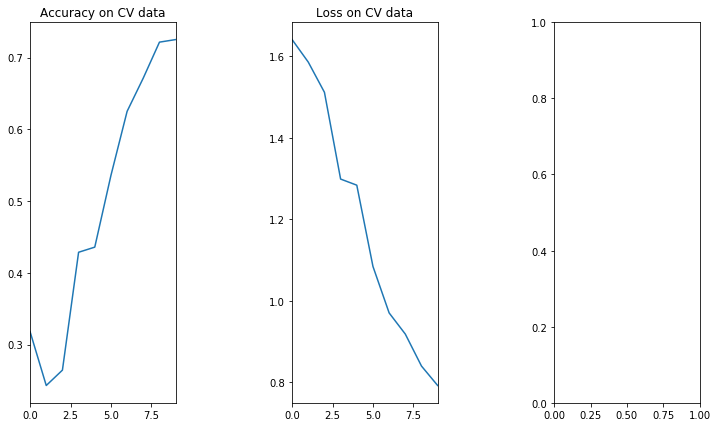

In [33]:
f,ax=plt.subplots(1,3,figsize=(12,3))
pd.Series(acc_list).plot(kind='line',title='Accuracy on CV data',ax=ax[0])
pd.Series(loss_list).plot(kind='line',figsize=(12,7),title='Loss on CV data',ax=ax[1])
#pd.Series(auc_list).plot(kind='line',figsize=(12,7),title='AUC on CV data',ax=ax[2])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('Accuracy on CV data')
ax[1].set_title('Loss on CV data')
#ax[2].set_title('AUC on CV data')
plt.show()

In [34]:
with tf.Session() as session:
    saver.restore(session, "CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([tf.nn.softmax(y_pred)], feed_dict={x:test_x[0:64] , hold_prob1:1,hold_prob2:1})

print(np.array(k).shape)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from CNN_MC.ckpt
Model restored.
Initialized
(1, 57, 5)


In [35]:
#Reshaping k
k = np.array(k).reshape(57,output_classes)

print(k[0])

pred_labels = []

for i in range(57):
    r = np.round(k[i],3).argmax()
    if r ==0 : pred_labels.append("coolant")
    elif r ==1: pred_labels.append("dipstick")
    elif r ==2: pred_labels.append("engine")
    elif r ==3: pred_labels.append("oilcap")
    elif r ==4: pred_labels.append("wipper")    

[1.0753506e-03 2.7236202e-01 3.5666340e-05 6.5173298e-01 7.4794009e-02]


In [36]:
w=80
h=80
columns = 8
rows = 8

(57, 227, 227, 3)


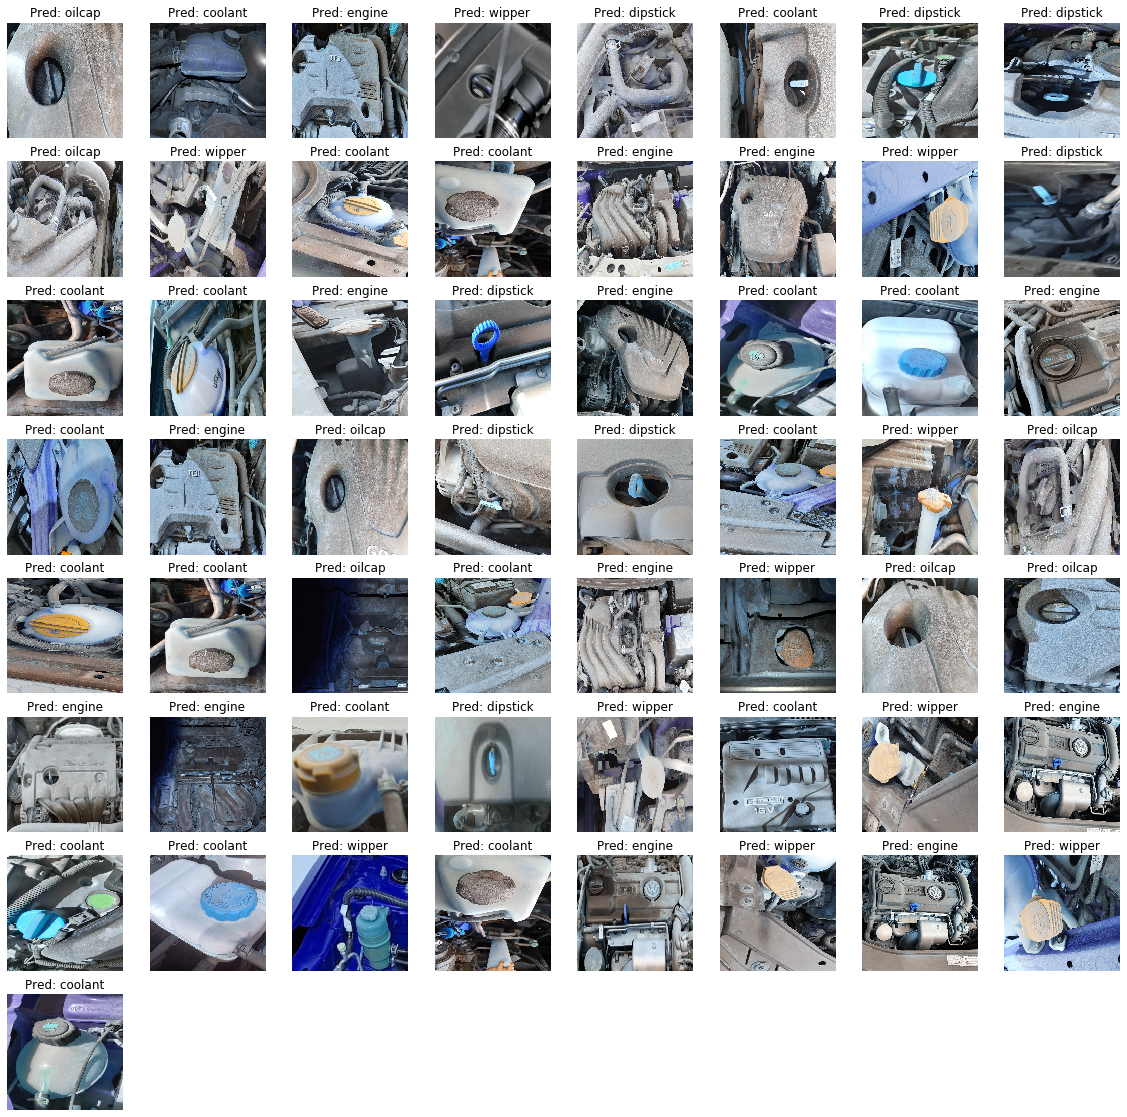

In [37]:
images = test_x[:57]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([IMG_SIZE_ALEXNET, IMG_SIZE_ALEXNET, 3])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
    if m == 57:
        break
plt.show()